In [2]:
#Loading data set for Annual Ticket Sales from csv file which depicts 
#Credentials have been removed for the IBM Cloud Object Storage

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_caf82072232c4da9bbcd29f558f4d1e3 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_caf82072232c4da9bbcd29f558f4d1e3 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_caf82072232c4da9bbcd29f558f4d1e3 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=
    ibm_auth_endpoint=
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_caf82072232c4da9bbcd29f558f4d1e3)

body = client_caf82072232c4da9bbcd29f558f4d1e3.get_object(Bucket='hollywoodtheatricalmarketsynopsis-donotdelete-pr-orrofocwf5iecv',Key='AnnualTicketSales.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97


In [3]:
df_data_1.dtypes

YEAR                                    int64
TICKETS SOLD                           object
TOTAL BOX OFFICE                       object
TOTAL INFLATION ADJUSTED BOX OFFICE    object
AVERAGE TICKET PRICE                   object
dtype: object

In [6]:
#Several columns have been uploaded in the incorrect data type
#Below is the code for removing unnecessary characters from the data set

df_data_1['TICKETS SOLD'] = df_data_1['TICKETS SOLD'].str.replace(r',', '')
df_data_1['TOTAL BOX OFFICE'] = df_data_1['TOTAL BOX OFFICE'].str.replace(r'$','')
df_data_1['TOTAL BOX OFFICE'] = df_data_1['TOTAL BOX OFFICE'].str.replace(r',','')
df_data_1['TOTAL INFLATION ADJUSTED BOX OFFICE'] = df_data_1['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace(r'$','')
df_data_1['TOTAL INFLATION ADJUSTED BOX OFFICE'] = df_data_1['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace(r',','')
df_data_1['AVERAGE TICKET PRICE'] = df_data_1['AVERAGE TICKET PRICE'].str.replace(r'$','')
df_data_1.head()

/tmp/wsuser/ipykernel_154/1585519254.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_data_1['TOTAL BOX OFFICE'] = df_data_1['TOTAL BOX OFFICE'].str.replace(r'$','')
/tmp/wsuser/ipykernel_154/1585519254.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_data_1['TOTAL INFLATION ADJUSTED BOX OFFICE'] = df_data_1['TOTAL INFLATION ADJUSTED BOX OFFICE'].str.replace(r'$','')
/tmp/wsuser/ipykernel_154/1585519254.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_data_1['AVERAGE TICKET PRICE'] = df_data_1['AVERAGE TIC

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,423774881,3881777912,3881777912,9.16
1,2020,223638958,2048534616,2048534616,9.16
2,2019,1228541629,11253443955,11253444050,9.16
3,2018,1311536128,11948096650,12013670952,9.11
4,2017,1225639761,10993991460,11226860216,8.97


In [7]:
# The data set will now need to be converted to the correct data type

df_data_1[['TICKETS SOLD']] = df_data_1[['TICKETS SOLD']].apply(pd.to_numeric)
df_data_1[['TOTAL BOX OFFICE']] = df_data_1[['TOTAL BOX OFFICE']].apply(pd.to_numeric)
df_data_1[['TOTAL INFLATION ADJUSTED BOX OFFICE']] = df_data_1[['TOTAL INFLATION ADJUSTED BOX OFFICE']].apply(pd.to_numeric)
df_data_1[['AVERAGE TICKET PRICE']] = df_data_1[['AVERAGE TICKET PRICE']].apply(pd.to_numeric)
df_data_1.dtypes

YEAR                                     int64
TICKETS SOLD                             int64
TOTAL BOX OFFICE                         int64
TOTAL INFLATION ADJUSTED BOX OFFICE      int64
AVERAGE TICKET PRICE                   float64
dtype: object

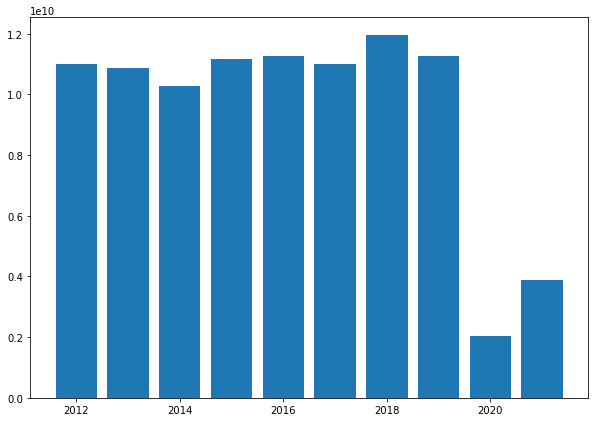

In [8]:
#Now that the data is in the correct format we can utilize it to create a visulation of the data
#Below is a bar graph depicting the steep decline of total box office dollars in 2020 and 2021 coinciding with the COVID19 Pandemic

import numpy as np
import matplotlib.pyplot as plt

year = df_data_1['YEAR']
gross = df_data_1['TOTAL BOX OFFICE']

fig = plt.figure(figsize =(10, 7))
 
plt.bar(year[0:10], gross[0:10])
 
plt.show()

In [10]:
#Now we will load data from the data set Highest Grossers showing data for each of the highest grossing films from year 1995 - 2021

body = client_caf82072232c4da9bbcd29f558f4d1e3.get_object(Bucket='hollywoodtheatricalmarketsynopsis-donotdelete-pr-orrofocwf5iecv',Key='HighestGrossers.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()


,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,"$184,031,112","$387,522,978","4,23,06,002"
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,"$306,169,255","$634,504,608","6,92,69,062"
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,"$250,650,052","$500,207,943","5,46,07,854"
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,"$443,319,081","$865,842,808","9,45,24,324"
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,"$430,443,350","$776,153,749","8,47,32,942"


In [11]:
#As before the data will need to be cleaned before use

df_data_2.dtypes

YEAR                      int64
MOVIE                    object
GENRE                    object
MPAA RATING              object
DISTRIBUTOR              object
TOTAL FOR YEAR           object
TOTAL IN 2019 DOLLARS    object
TICKETS SOLD             object
dtype: object

In [12]:
df_data_2['TOTAL FOR YEAR'] = df_data_2['TOTAL FOR YEAR'].str.replace(r',', '')
df_data_2['TOTAL FOR YEAR'] = df_data_2['TOTAL FOR YEAR'].str.replace(r'$','')
df_data_2['TOTAL IN 2019 DOLLARS'] = df_data_2['TOTAL IN 2019 DOLLARS'].str.replace(r',', '')
df_data_2['TOTAL IN 2019 DOLLARS'] = df_data_2['TOTAL IN 2019 DOLLARS'].str.replace(r'$','')
df_data_2['TICKETS SOLD'] = df_data_2['TICKETS SOLD'].str.replace(r',', '')
df_data_2.head()

/tmp/wsuser/ipykernel_154/1702027495.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_data_2['TOTAL FOR YEAR'] = df_data_2['TOTAL FOR YEAR'].str.replace(r'$','')
/tmp/wsuser/ipykernel_154/1702027495.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_data_2['TOTAL IN 2019 DOLLARS'] = df_data_2['TOTAL IN 2019 DOLLARS'].str.replace(r'$','')


,YEAR,MOVIE,GENRE,MPAA RATING,DISTRIBUTOR,TOTAL FOR YEAR,TOTAL IN 2019 DOLLARS,TICKETS SOLD
0,1995,Batman Forever,Drama,PG-13,Warner Bros.,184031112,387522978,42306002
1,1996,Independence Day,Adventure,PG-13,20th Century Fox,306169255,634504608,69269062
2,1997,Men in Black,Adventure,PG-13,Sony Pictures,250650052,500207943,54607854
3,1998,Titanic,Adventure,PG-13,Paramount Pictures,443319081,865842808,94524324
4,1999,Star Wars Ep. I: The Phantom Menace,Adventure,PG,20th Century Fox,430443350,776153749,84732942


In [13]:
df_data_2[['TOTAL FOR YEAR']] = df_data_2[['TOTAL FOR YEAR']].apply(pd.to_numeric)
df_data_2[['TOTAL IN 2019 DOLLARS']] = df_data_2[['TOTAL IN 2019 DOLLARS']].apply(pd.to_numeric)
df_data_2[['TICKETS SOLD']] = df_data_2[['TICKETS SOLD']].apply(pd.to_numeric)
df_data_2.dtypes

YEAR                      int64
MOVIE                    object
GENRE                    object
MPAA RATING              object
DISTRIBUTOR              object
TOTAL FOR YEAR            int64
TOTAL IN 2019 DOLLARS     int64
TICKETS SOLD              int64
dtype: object

<AxesSubplot:ylabel='YEAR'>

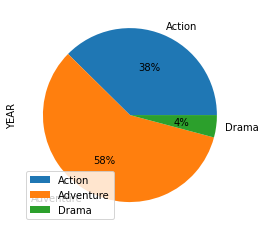

In [14]:
#Below is a pie chart depicting the percentage of each genre for the highest of the year from 1995-2021

df_data_2.groupby(['GENRE']).sum().plot(kind='pie', y='YEAR', autopct='%1.0f%%')

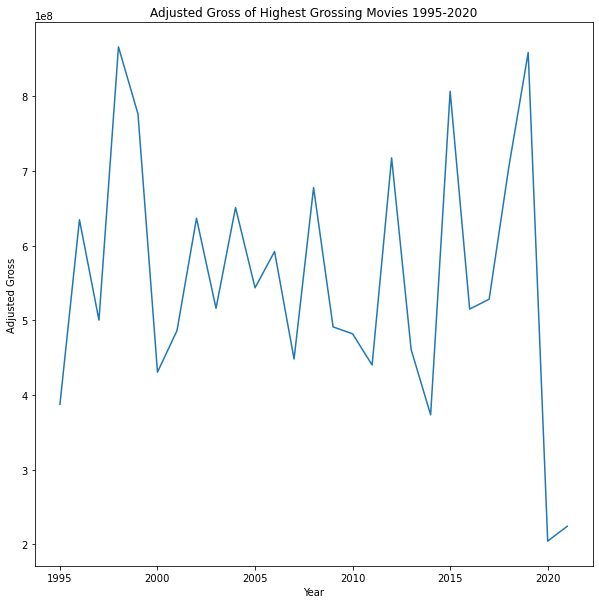

In [23]:
#Below is a line graph showing that even the highest grossing films in 2020 an 2021 saw a steep decrease coinciding with the COVID 19 pandemic

import numpy as np
  

x = df_data_2["YEAR"]
y = df_data_2['TOTAL IN 2019 DOLLARS']

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
  
plt.plot(x, y)  
plt.xlabel("Year")
plt.ylabel("Adjusted Gross")
plt.title("Adjusted Gross of Highest Grossing Movies 1995-2020")

plt.show()